# **1-) Importing Required Libraries**

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# **2-) Gathering and Observing Data**

In [256]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
dataset.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [257]:
dataset.shape

(34857, 21)

In [258]:
num_columns = dataset.shape[1]
print("Number of Columns:",num_columns)

Number of Columns: 21


In [259]:
print("Size of Dataset:", dataset.size)

Size of Dataset: 731997


In [260]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# **3-) Exploratory Data Analysis**

In [261]:
categorical_columns = ["Suburb", "Address", "Type", "Method", "SellerG", "Date", "CouncilArea", "Regionname"]
num_columns = ["Rooms", "Price", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Propertycount"]

In [262]:
dataset = dataset.drop_duplicates()

In [263]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34852    False
34853    False
34854    False
34855    False
34856    False
Length: 34856, dtype: bool

In [264]:
for column in categorical_columns:
  dataset[column] = dataset[column].fillna(dataset[column].mode().loc[0])

for column in num_columns:
  dataset[column] = dataset[column].fillna(dataset[column].mode().loc[0])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  int64  
 3   Type           34856 non-null  object 
 4   Price          34856 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       34856 non-null  float64
 11  Bathroom       34856 non-null  float64
 12  Car            34856 non-null  float64
 13  Landsize       34856 non-null  float64
 14  BuildingArea   34856 non-null  float64
 15  YearBuilt      34856 non-null  float64
 16  CouncilArea    34856 non-null  object 
 17  Lattitude      34856 non-null  float64
 18  Longti

In [265]:
from scipy import stats
z_scores_landsize = np.abs(stats.zscore(dataset['Landsize']))
z_scores_buildingarea = np.abs(stats.zscore(dataset['BuildingArea']))
threshold = 3

outliers_landsize = np.where(z_scores_landsize > threshold)
outliers_buildingarea = np.where(z_scores_buildingarea > threshold)

outliers_indices = set(outliers_landsize[0]) | set(outliers_buildingarea[0])

dataset = dataset.drop(index=list(outliers_indices))

dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,120.0,1970.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,120.0,1970.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,600000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,120.0,1970.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,120.0,1970.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,1.0,2.0,0.0,120.0,1970.0,Maribyrnong City Council,-37.83610,144.99660,Western Metropolitan,6543.0


### **3a-) Data Visualization**

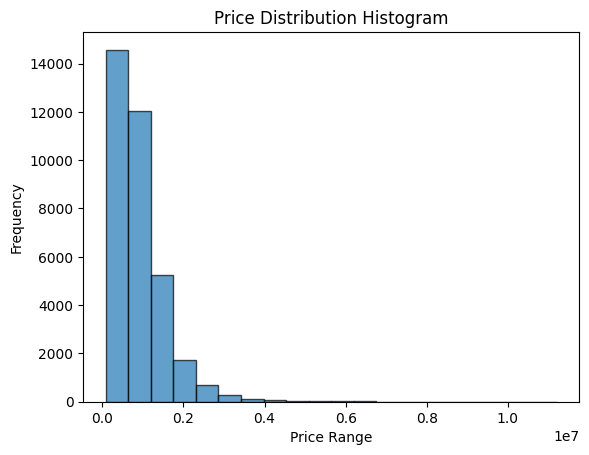

In [266]:
plt.hist(dataset["Price"], bins=20, edgecolor='k', alpha=0.7)

plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')

plt.show()

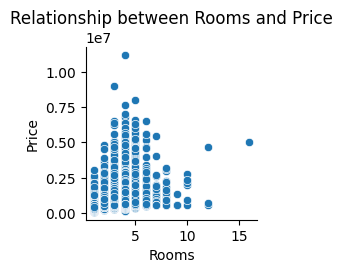

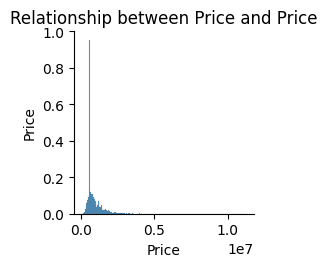

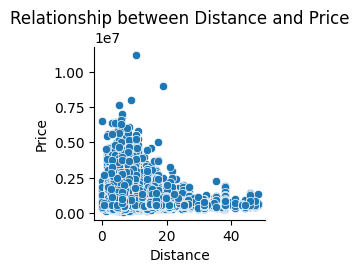

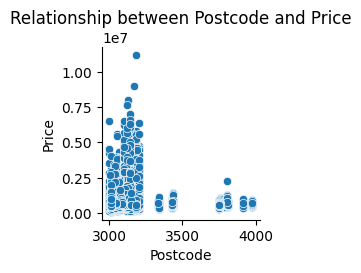

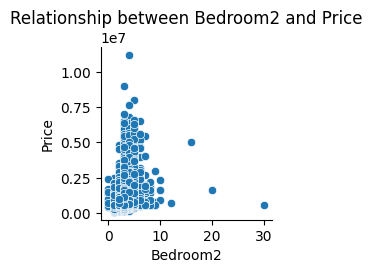

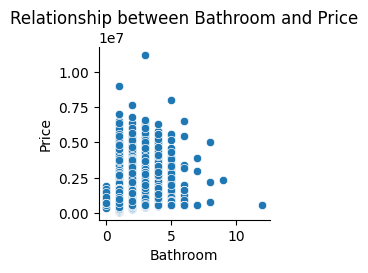

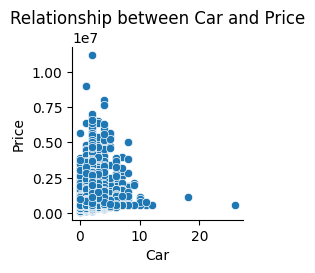

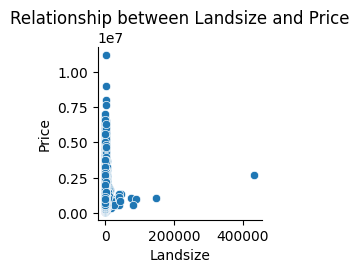

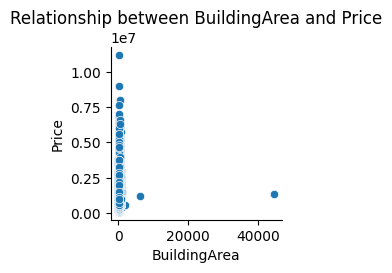

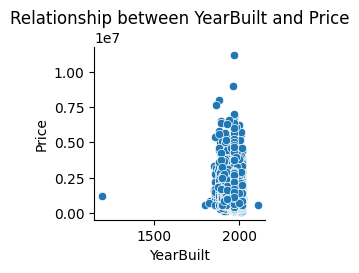

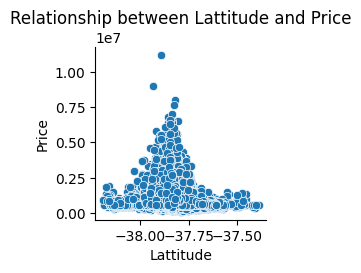

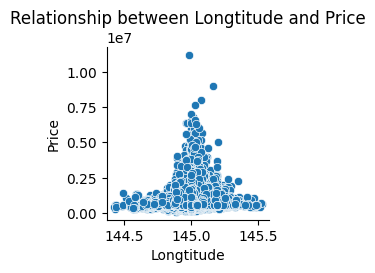

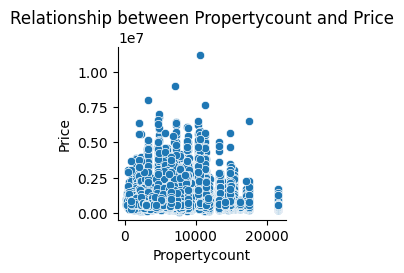

In [267]:
for i in range(len(num_columns)):
    sns.pairplot(data=dataset, y_vars=['Price'], x_vars=[num_columns[i]])
    plt.title(f'Relationship between {num_columns[i]} and Price')
    plt.show()

In [268]:
le = LabelEncoder()
dataset = dataset.apply(lambda x: le.fit_transform(x) if x.dtype == "object" else x)

dataset.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29390,2,0,600000.0,6,155,58,2.5,3067.0,...,1.0,1.0,126.0,120.0,1970.0,31,-37.8014,144.9958,2,4019.0
1,0,32442,2,0,1480000.0,2,33,60,2.5,3067.0,...,1.0,1.0,202.0,120.0,1970.0,31,-37.7996,144.9984,2,4019.0
2,0,15355,2,0,1035000.0,2,33,63,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9746,3,2,600000.0,7,296,63,2.5,3067.0,...,2.0,1.0,0.0,120.0,1970.0,31,-37.8114,145.0116,2,4019.0
4,0,25069,3,0,1465000.0,5,33,64,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


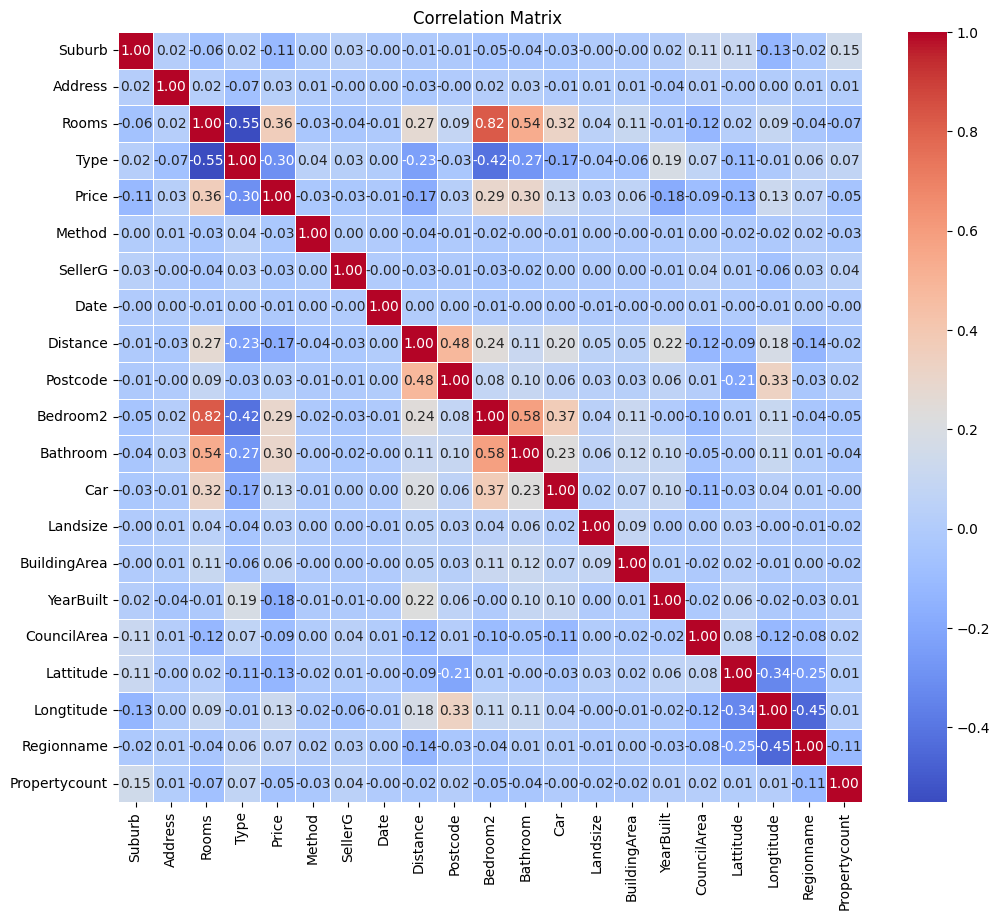

In [269]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix ")

plt.show()

In [270]:
dataset = dataset.drop(["Suburb", "Lattitude",], axis=1)
dataset.nunique()

Address          33937
Rooms               12
Type                 3
Price             2868
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1668
BuildingArea       729
YearBuilt          160
CouncilArea         33
Longtitude       14495
Regionname           8
Propertycount      342
dtype: int64

# **4-) Model Selection**

In [271]:
X = dataset.drop("Price", axis=1)
y = dataset["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = {
    'Lasso': {
        'model': Lasso()
        },
    'LinearRegression': {
        'model': LinearRegression()
        },
    'Ridge': {
        'model': Ridge()
        },
    'ElasticNet': {
        'model': ElasticNet()
        },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
        },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
        },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
        },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
        },
}

for model_name, model_info in models.items():
    model = model_info['model']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("MAE ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2: ", r2)
    print()

Model: Lasso
MAE  325343.5446529863
MSE:  253424714079.0807
RMSE:  503413.06506593636
R2:  0.28930885685004337

Model: LinearRegression
MAE  325343.7427142062
MSE:  253424922307.4431
RMSE:  503413.2718824993
R2:  0.289308272905208

Model: Ridge
MAE  325342.9614019077
MSE:  253422832690.2964
RMSE:  503411.1964292177
R2:  0.28931413291931185

Model: ElasticNet
MAE  336458.7103545116
MSE:  262301859092.844
RMSE:  512154.1360692541
R2:  0.2644142511259516

Model: KNeighborsRegressor
MAE  396699.3631162857
MSE:  358573499812.2335
RMSE:  598810.0698988232
R2:  -0.0055649521432081794

Model: RandomForestRegressor
MAE  251373.73332518805
MSE:  196585814107.81134
RMSE:  443379.98839349
R2:  0.4487049242097654

Model: GradientBoostingRegressor
MAE  272486.03802220954
MSE:  206566312025.54428
RMSE:  454495.6677742311
R2:  0.42071613274507025

Model: AdaBoostRegressor
MAE  349798.82734909974
MSE:  265403204765.09793
RMSE:  515172.98528270866
R2:  0.2557169979431799



In [272]:
best_model = RandomForestRegressor(n_estimators=100, random_state = 0)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MAE:  251532.70577212403
MSE:  195103297184.97495
RMSE:  441704.9888613156
R2:  0.4528624178877536
